#***16. ANN (Artificial Neural Network)***
# 1. Binary classification 

---



In [ ]:
X.head(3)
X.columns
x_train.head(3)
y_train.head(3)

,Churn
6030,1
3410,1
5483,1


In [ ]:
Y.head(3)

,Churn
0,0
1,0
2,1


In [ ]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier_ann = Sequential() #The Sequential class allows us to build ANN but as a sequence of layers. 

In [ ]:
from keras.layers.serialization import activation
classifier_ann.add(Dense(3, activation = 'sigmoid',input_dim = 26 )) #Add the input layer and the first hidden layer
#Object Dense will create layers , it is input layer , 3 = # of layers , 26*3 = 78
#Dense is the famous class in Tensorflow. Dense is used to add fully connected layer in ANN.
#“add” is the method in the Sequential Class. output_dim represents the number of hidden neurons in the hidden layer.

In [ ]:
classifier_ann.add(Dense(1, activation = 'sigmoid')) #add the output layer 
# 1*3 = 3 + 78 = 81 

In [ ]:
classifier_ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 81        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier_ann.compile(loss='binary_crossentropy', optimizer='Adam' ,metrics=['accuracy']) #For evaluating our ANN model, use Accuracy metrics. And that’s why metrics = [‘accuracy’].
#compile is a method of Tensorflow. “adam’ is the optimizer that can perform the stochastic gradient descent. 

In [ ]:
history = classifier_ann.fit(x_train, y_train , epochs=10 ,validation_split=0.2) # trainig stage of ANN model 

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.7649 - val_loss: 0.4876 - val_accuracy: 0.7538
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7684 - val_loss: 0.4935 - val_accuracy: 0.7547
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7658 - val_loss: 0.4986 - val_accuracy: 0.7591
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7676 - val_loss: 0.4821 - val_accuracy: 0.7547
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7678 - val_loss: 0.4874 - val_accuracy: 0.7556
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7684 - val_loss: 0.5265 - val_accuracy: 0.7556
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7682 - val_loss: 0.4670 - val_accuracy: 0.7769
Epoch 

In [ ]:
classifier_ann.layers[0].get_weights()

[array([[-0.7737063 ,  0.25631183,  0.11525933],
        [ 0.11470339, -0.8460988 , -0.33824274],
        [-0.4529826 ,  0.31229913, -0.05556864],
        [-0.73239696,  0.5572738 ,  0.19749348],
        [-0.08723442, -0.36182094, -0.25110012],
        [-1.1535685 , -0.06326672, -0.23448652],
        [ 0.22793764,  0.11059491, -0.11383548],
        [-0.13547654,  0.28148806, -0.03746644],
        [ 0.11402511, -0.11870154,  0.04028668],
        [-0.12099788,  0.26406243, -0.5006638 ],
        [-0.00325772,  0.21388915,  0.5440019 ],
        [ 0.49107602, -0.16103554, -0.5430625 ],
        [ 0.44800958, -0.42785534, -0.09597056],
        [ 0.0747029 , -0.6234381 ,  0.27618775],
        [ 0.22101466, -0.08690608,  0.064709  ],
        [-0.01819218,  0.05694092, -0.1394119 ],
        [-0.02534445, -0.38610077, -0.6055665 ],
        [ 0.2246412 , -0.93945116, -0.58104837],
        [-1.314925  ,  0.02313938,  0.13784583],
        [-0.6004249 ,  0.287358  ,  0.41121587],
        [-0.98020566

In [ ]:
classifier_ann.layers[1].get_weights()

[array([[ 1.1991361 ],
        [-1.3036402 ],
        [-0.64400375]], dtype=float32), array([-0.21221633], dtype=float32)]

In [ ]:
y_log = classifier_ann.predict(x_test) # we didnt get output as 0 or 2 because we are using sigmid function . and between o to 1 , it will be a probability

44/44 [==============================] - 0s 2ms/step


In [ ]:
# for converting it into 0-1 we need to decide a threeshold  , here it is assumed as 0.5 , so if op is grater than 0.5 then custoemr will churn 
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7697228144989339

In [ ]:
history.history

{'loss': [0.49555251002311707,
  0.49402159452438354,
  0.49380576610565186,
  0.48778364062309265,
  0.48688775300979614,
  0.4903198182582855,
  0.4821608066558838,
  0.4776555299758911,
  0.4760439991950989,
  0.480467826128006],
 'accuracy': [0.7648888826370239,
  0.7684444189071655,
  0.7657777667045593,
  0.7675555348396301,
  0.7677778005599976,
  0.7684444189071655,
  0.7682222127914429,
  0.7682222127914429,
  0.7680000066757202,
  0.7684444189071655],
 'val_loss': [0.4876457154750824,
  0.4934520423412323,
  0.4985749125480652,
  0.4821072518825531,
  0.48739904165267944,
  0.5264777541160583,
  0.4669783115386963,
  0.4694284498691559,
  0.4733212888240814,
  0.4608185887336731],
 'val_accuracy': [0.753777801990509,
  0.7546666860580444,
  0.7591111063957214,
  0.7546666860580444,
  0.7555555701255798,
  0.7555555701255798,
  0.776888906955719,
  0.7688888907432556,
  0.7680000066757202,
  0.776888906955719]}

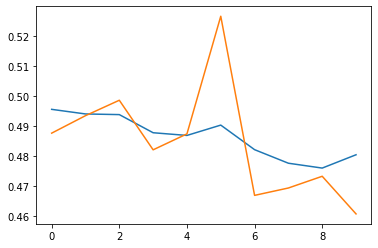

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

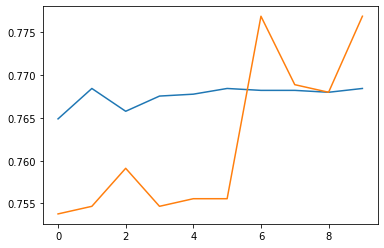

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])